1. What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each?
>> K-Means: Partitional clustering; you must choose the number of clusters K in advance. Works best for large datasets with spherical clusters.
Use case: Segmenting customers by purchasing behavior.

Hierarchical Clustering: Builds a tree (dendrogram) showing nested clusters; number of clusters can be chosen later. Can capture non-spherical clusters but slower on large datasets.
Use case: Grouping genes by expression patterns in bioinformatics.

2.Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.
>> The Silhouette Score evaluates clustering quality by measuring how close each point is to its own cluster compared to other clusters.

Score ranges from -1 to 1:

Close to 1 → well-clustered, far from other clusters

Around 0 → on the cluster boundary

Negative → likely misclassified

Helps compare clustering results and choose the best algorithm or number of clusters without needing labels.

3. What are the core parameters of DBSCAN, and how do they influence the
clustering process?
>> DBSCAN parameters:

eps - How close points need to be to be neighbors.

min_samples - Minimum points to form a dense cluster.

Determines cluster size, shape, and which points are considered noise.


4. Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?
>> eature scaling is important because clustering algorithms like K-Means and DBSCAN use distance measures (e.g., Euclidean distance) to group points.

If features have different scales (e.g., age in years vs. income in lakhs), larger-scale features dominate the distance, biasing the clusters.

Scaling (e.g., Standardization or Min-Max scaling) ensures all features contribute equally, leading to more meaningful clusters.

5.  What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?
>> The Elbow Method is a way to choose the optimal number of clusters (K) in K-Means.

How it works:

Run K-Means with different values of K.

Calculate the inertia (sum of squared distances of points to their cluster centroids) for each K.

Plot inertia vs. K.

Interpretation:

Look for the “elbow point” in the plot — where the decrease in inertia slows down sharply.

That K balances compact clusters without unnecessary complexity.

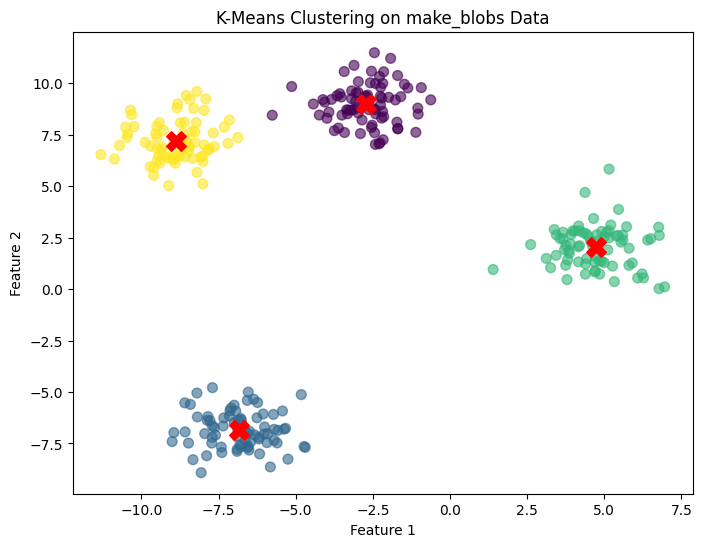

In [ ]:
# 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
# apply KMeans clustering, and visualize the results with cluster centers.
# (Include your Python code and output in the code box below.)
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_


plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', s=50, alpha=0.6)
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X')  # cluster centers
plt.title("K-Means Clustering on make_blobs Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
# 7.Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
# model. Print the number of clusters found (excluding noise).
# Import libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load Wine dataset
wine = load_wine()
X = wine.data

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # You can tune eps/min_samples
dbscan.fit(X_scaled)
labels = dbscan.labels_

# 4. Count clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


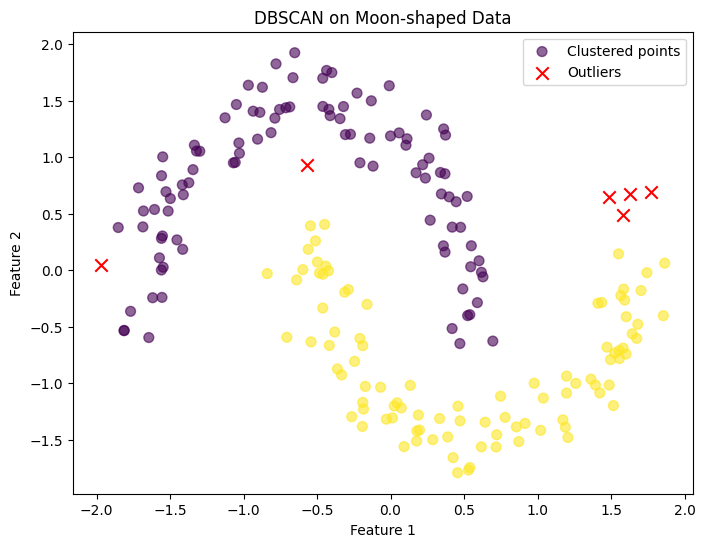

In [ ]:
# 8. Generate moon-shaped synthetic data using
# make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
# the plot.
# (Include your Python code and output in the code box below.)
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate moon-shaped data
X, y_true = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)
labels = dbscan.labels_

# 4. Identify outliers (noise)
outliers = X_scaled[labels == -1]
clusters = X_scaled[labels != -1]

# 5. Plot clusters and outliers
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[labels != -1, 0], X_scaled[labels != -1, 1],
            c=labels[labels != -1], cmap='viridis', s=50, alpha=0.6, label='Clustered points')
plt.scatter(outliers[:,0], outliers[:,1], c='red', s=80, marker='x', label='Outliers')
plt.title("DBSCAN on Moon-shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


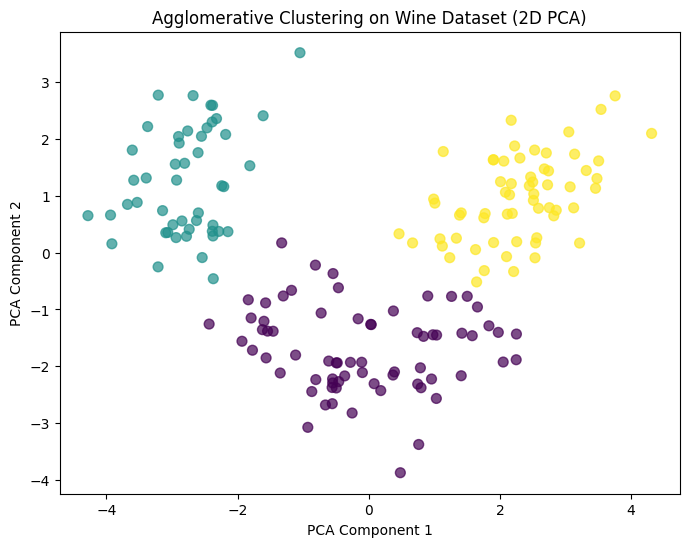

In [ ]:
#  9: Load the Wine dataset, reduce it to 2D using PCA, then apply
# Agglomerative Clustering and visualize the result in 2D with a scatter plot.


import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target  # True labels (optional for reference)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)


agg_clust = AgglomerativeClustering(n_clusters=3)  # Wine has 3 classes
labels = agg_clust.fit_predict(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title("Agglomerative Clustering on Wine Dataset (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



 10.You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?
1. Choose Clustering Algorithm
Primary algorithm: K-Means

Efficient for large datasets (typical in e-commerce).

Works well if clusters are roughly spherical in feature space (common after preprocessing).

Alternative / complementary algorithms:

DBSCAN: If we want to detect outliers (rare customer behaviors).

Hierarchical Clustering: Useful for small datasets or to visualize cluster hierarchy for management.

2. Data Preprocessing

Handle missing values:

Impute missing demographic data with mean/median/mode.

For purchase history, missing values may indicate zero purchases.

Encoding categorical variables:

Convert categorical features (gender, region) using one-hot encoding.

Feature scaling:

Apply StandardScaler or MinMaxScaler because K-Means and DBSCAN rely on distance metrics.

Optional: Dimensionality reduction (PCA) if there are many features to reduce noise and improve performance.

3. Determine Number of Clusters

Elbow Method: Plot inertia vs. number of clusters to identify the “elbow” point.

Silhouette Score: Evaluate cluster separation; choose K that maximizes the score.

Domain knowledge: Consider marketing feasibility (e.g., too many segments may be impractical to target).

4. Apply Clustering

Fit the clustering algorithm on the preprocessed dataset.

Assign each customer to a cluster.

Analyze clusters: look at average spending, preferred categories, demographics.

5. Benefit to Marketing Team

Targeted promotions: Send personalized offers to each segment (e.g., high-value customers get loyalty rewards).

Product recommendations: Suggest products based on cluster-specific purchase patterns.

Customer retention: Identify low-engagement clusters to target with retention campaigns.

Strategic insights: Understand customer diversity and tailor marketing strategies accordingly.